### Exploring Iris Data Set using Principal Component Analysis, Linear Discriminant Analysis, K-Means, and KNN
###### Author: Rajkumar Conjeevaram Mohan (rajkumarcm@yahoo.com)

In [17]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal as m_normal

In [18]:
# Load the data
df = pd.read_csv(filepath_or_buffer='../data/Iris/iris.data',
                 sep=',',
                 header=None,
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'],
                 #dtype=float,
                 skip_blank_lines=True
                 )

In [19]:
df.shape

(150, 5)

In [20]:
# Lets separate the type column from the rest of the data
# by storing it in a separate variable

y = df['type']
df = df.drop(['type'], axis=1)
data_classes = y.unique()

In [21]:
# Lets take a peek at the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
print(data_classes)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Data Visualisation

### Original Data

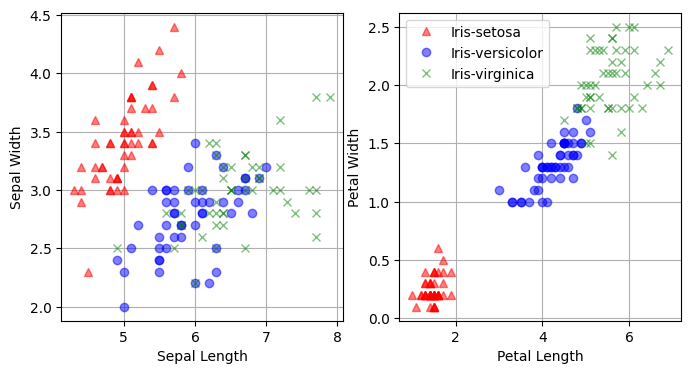

In [33]:
# At this stage though, it would not be possible to visualise the data since it lives in 4 dimensional
# space but what we could instead look at is the correlation between their features
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for t, i, m, c in zip(data_classes, range(len(data_classes)), ['^', 'o', 'x'], ['r', 'b', 'g']):
    indices = y == t
    
    axes[0].plot(df['sepal_length'][indices],
                 df['sepal_width'][indices],
                 '%c%c'%(m,c), linewidth=0.8,
                 alpha=0.5, label=t)
    
    axes[1].plot(df['petal_length'][indices],
                 df['petal_width'][indices],
                 '%c%c'%(m,c), linewidth=0.8,
                 alpha=0.5, label=t)
plt.legend()
axes[0].grid(True)    
axes[1].grid(True)
axes[0].set_xlabel('Sepal Length')
axes[0].set_ylabel('Sepal Width')
axes[1].set_xlabel('Petal Length')
axes[1].set_ylabel('Petal Width')
plt.show()

### Principal Component Analysis

In [24]:
# The data does not look bad. Let's explore how PCA, and other algorithms make them separable.
df_pca = df.copy(deep=True)

# 1. Mean Subtraction
df_pca -= df_pca.mean(axis=0)

# 2. Compute the covariance of the features
cov = (df_pca.T @ df_pca) / (df_pca.shape[0] -1)

# 3. Eigen-analysis
V_PCA, U_PCA = np.linalg.eig(cov)

indices = np.argsort(V_PCA)[::-1]
V_PCA = V_PCA[indices]
U_PCA = U_PCA[:, indices]

print("Variance present in each axis:\n{}".format(V_PCA))
print("\nWe only pick the top two axis, which allows for easy visualisation. And also as you could see from the list of variances present in each axis, we would not suffer from much of an informational loss")

V_PCA = V_PCA
U_PCA = U_PCA[:, :2]

pca_comp = df_pca @ U_PCA

p_c = pd.DataFrame(U_PCA, columns = ['Principal Component 1', 'Principal Component 2'])

p_c

Variance present in each axis:
[4.22484077 0.24224357 0.07852391 0.02368303]

We only pick the top two axis, which allows for easy visualisation. And also as you could see from the list of variances present in each axis, we would not suffer from much of an informational loss


,Principal Component 1,Principal Component 2
0,0.361590,-0.656540
1,-0.082269,-0.729712
2,0.856572,0.175767
3,0.358844,0.074706


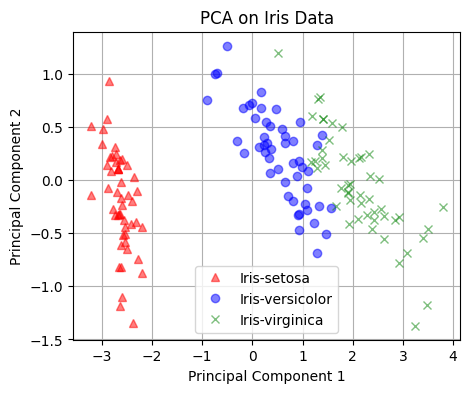

In [25]:
fig = plt.figure(figsize=(5, 4))
for t, i, m, c in zip(data_classes, range(len(data_classes)), ['^', 'o', 'x'], ['r', 'b', 'g']):
    
    indices = y == t
    plt.plot(pca_comp[0][indices],
             pca_comp[1][indices],
             '%c%c'%(m,c), linewidth=0.8,
             alpha=0.5, label=t)

plt.legend()
plt.grid(True)    
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA on Iris Data")

plt.show()

### Linear Discriminant Analysis

In [26]:
# The data does not look bad. Let's explore how LDA, and other algorithms make them separable.
df_lda = df.copy(deep=True)

# Feature dimension
F = df_lda.shape[1]

# Compute within class scatter matrix
Sw = np.zeros([F, F])
for c in data_classes:
    indices = y == c
    tmp = df_lda[indices] - df_lda[indices].mean()
    Sw += (tmp.T @ tmp) / (tmp.shape[0] - 1)

# Compute the between class scatter matrix
b_c = []
for c in data_classes:
    indices = y == c
    b_c.append(df_lda[indices].mean())
    
b = np.concatenate(b_c, axis=0)
b = np.mean(b_c, axis=0)
Sb = np.zeros([F, F])
for i in range(len(data_classes)):
    tmp = b_c[i] - b
    Sb += tmp @ tmp.T

# Eigen-analysis
cov = np.linalg.inv(Sw) @ Sb
V_LDA, U_LDA = np.linalg.eig(cov)
V_LDA = np.real(V_LDA)
U_LDA = np.real(U_LDA)
indices = np.argsort(V_LDA)[::-1]
V_LDA = V_LDA[indices]
U_LDA = U_LDA[:, indices]
V_LDA = list(map(lambda x: round(x, 2), V_LDA))
print("Variance present in each axis:\n{}".format(V_LDA))
print("\nSimilar to PCA, we will again ignore axes which does not have much information to add")

# Projecting data onto subspace
V_LDA = V_LDA[:2]
U_LDA = U_LDA[:, :2]
lda_comp = df_lda @ U_LDA

l_disc = pd.DataFrame(U_LDA, columns=['Linear Discriminant 1', 'Linear Discriminant 2'])
l_disc

Variance present in each axis:
[95.81, 0.0, -0.0, -0.0]

Similar to PCA, we will again ignore axes which does not have much information to add


,Linear Discriminant 1,Linear Discriminant 2
0,-0.003755,-0.735519
1,0.108602,0.073579
2,-0.016913,-0.011459
3,0.993934,0.673399


Text(0, 0.5, 'Linear Discriminant 2')

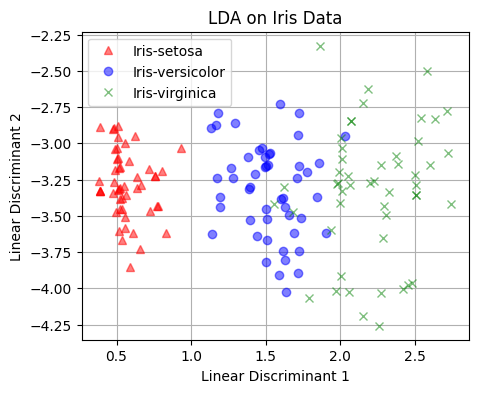

In [27]:
fig = plt.figure(figsize=(5, 4))
for t, i, m, c in zip(data_classes, range(len(data_classes)), ['^', 'o', 'x'], ['r', 'b', 'g']):
    
    indices = y == t
    plt.plot(lda_comp[0][indices],
             lda_comp[1][indices],
             '%c%c'%(m,c), linewidth=0.8,
             alpha=0.5, label=t)

plt.title("LDA on Iris Data")
plt.legend()
plt.grid(True)    
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')

In [28]:
lda_comp2 = df_pca @ U_LDA[:, 1]


Text(0, 0.5, 'constant')

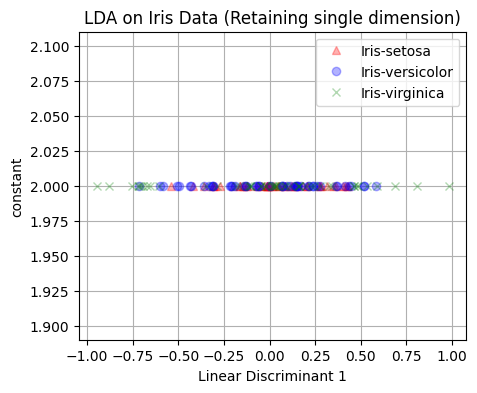

In [29]:
fig = plt.figure(figsize=(5, 4))
for t, i, m, c in zip(data_classes, range(len(data_classes)), ['^', 'o', 'x'], ['r', 'b', 'g']):
    
    indices = y == t
    plt.plot(lda_comp2[indices],
             np.ones([np.sum(indices)]) * 2,
             '%c%c'%(m,c), linewidth=0.8,
             alpha=0.3, label=t)

plt.title("LDA on Iris Data (Retaining single dimension)")
plt.legend()
plt.grid(True)    
plt.xlabel('Linear Discriminant 1')
plt.ylabel('constant')

From the above figure, we could easily spot Iris-versicolor data overlapping with Iris-virginica, which makes it not easy for classifying them

From the above algorithms it looks like LDA does good job in clustering data, and the space between data of different types appear to have increased.

## Clustering using K-Means

In [30]:
# We have already visualised how effectively PCA, and LDA have transformed the data such that classifier models can 
# achieve better performance in terms of accuracy, and in addition to them, lets just try running K-means on both 
# untouched and compressed data set for better understanding.

In [36]:
# For now lets assume we know the number of clusters. I know this is not the case always.
def kmeans(df, n_clusters=3):

    centroids = df.sample(n=n_clusters, replace=False)
    changed = True
    distance = np.zeros([df.shape[0], n_clusters]).astype(np.float32)
    cluster_mem = np.zeros([df.shape[0], 1])  # [N data points, cluster id]
    epochs = 0
    while changed:

        # Estimate the distance matrix
        # I understand this can be optimized,
        # but I would like to keep things simple for others to understand
        epochs += 1
        for i in range(df.shape[0]):
            for j in range(n_clusters):
                tmp = df.iloc[i] - centroids.iloc[j]
                distance[i, j] = np.sqrt(tmp.T @ tmp)
        new_cluster_mem = np.argmin(distance, axis=1)
        if (cluster_mem == new_cluster_mem).all():
            changed = False
        else:
            changed = True
            cluster_mem = np.copy(new_cluster_mem)

            # Re-estimate the centroids
            for j in range(n_clusters):
                indices = cluster_mem == j
                indices = np.where(indices)[0]
                centroids.iloc[j] = df.iloc[indices].mean(axis=0)
    return cluster_mem
    

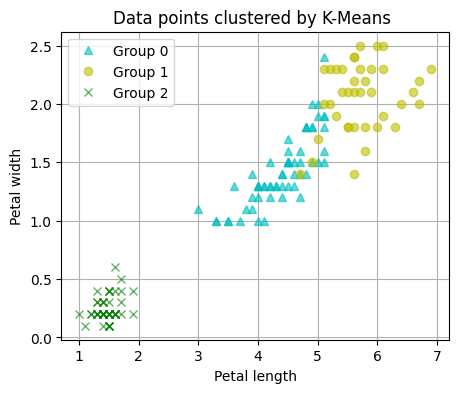

In [41]:
df_cluster_mem = kmeans(df)
plt.figure(figsize=(5, 4))
for k, m, c in zip(np.unique(df_cluster_mem), ['^', 'o', 'x'], ['c', 'y', 'g']):
    indices = df_cluster_mem == k
    plt.plot(df['petal_length'].iloc[indices],
             df['petal_width'].iloc[indices],
             '%c%c' % (m, c), linewidth=0.8,
             alpha=0.6, label='Group %d' % k)
plt.legend()
plt.grid(True)
plt.title("Data points clustered by K-Means ")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

Before we move on to the next algorithm, I think it would be interesting to look at how the algorithm performs when applied on compressed version of the dataset produced by the PCA, and LDA

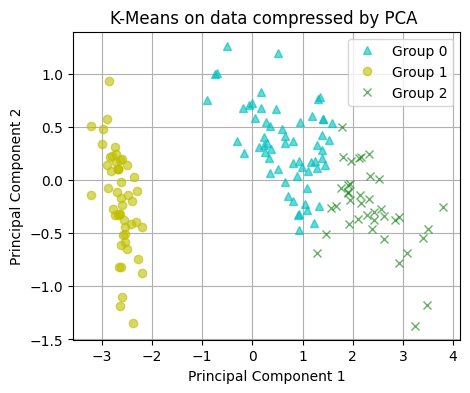

In [45]:
pca_cluster_mem = kmeans(pca_comp)
plt.figure(figsize=(5, 4))
for k, m, c in zip(np.unique(pca_cluster_mem), ['^', 'o', 'x'], ['c', 'y', 'g']):
    indices = pca_cluster_mem == k
    plt.plot(pca_comp.loc[indices, 0],
             pca_comp.loc[indices, 1],
             '%c%c' % (m, c), linewidth=0.8,
             alpha=0.6, label='Group %d' % k)
plt.legend()
plt.grid(True)
plt.title("K-Means on data compressed by PCA ")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

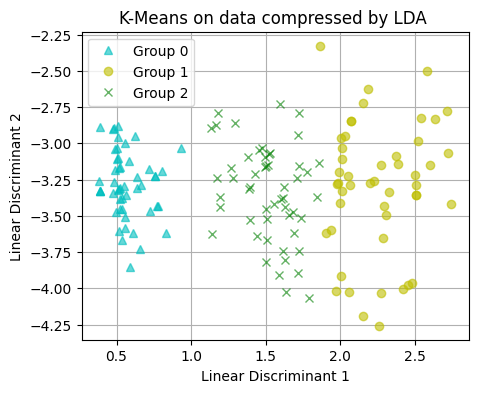

In [46]:
lda_cluster_mem = kmeans(lda_comp)
plt.figure(figsize=(5, 4))
for k, m, c in zip(np.unique(lda_cluster_mem), ['^', 'o', 'x'], ['c', 'y', 'g']):
    indices = lda_cluster_mem == k
    plt.plot(lda_comp.loc[indices, 0],
             lda_comp.loc[indices, 1],
             '%c%c' % (m, c), linewidth=0.8,
             alpha=0.6, label='Group %d' % k)
plt.legend()
plt.grid(True)
plt.title("K-Means on data compressed by LDA ")
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

In [52]:
#### In simple words poor performance. The classifier has clearly classified a lot of data points that belongs to Group 0 as Group 1, and vice versa. Instead of plainly implementing different algorithms to see their results, which is not the intent of writing this notebook, I wish to make some conclusion based on visual understanding of the plots. If you see the above plot, and the previous one, K means on LDA does not appear to have done a good job, that is the data do not look linearly separable. So I have started thinking what if I would project this onto different subspace, where it would be linearly separable.

In [51]:
# df_lda = df.copy(deep=True)
# df_lda

In [50]:
# df_lda = df.copy(deep=True)
# N = df_lda.shape[0]
# # Initialise parameters randomly
# p_mu_o = np.array([[-1, 0], [5, 2], [-2, 2]])
# p_cv_o = [np.eye(2,2)*0.1,
#           np.eye(2,2)*2,
#           np.eye(2,2)*3]
# p_mc_o = [1/3, 1/3, 1/3]

# for epoch in range(100):
#     # Expectation step
#     r_map = np.zeros([N*3, 3])
#     for k in range(3):
#         r_map[:, k] = p_mc_o[k] * \
#                       m_normal.pdf(x, mean=p_mu_o[k], cov=p_cv_o[k])
#     r_map /= np.sum(r_map, axis=1).reshape([N*3, -1])
    
#     # Maximization step
#     p_mc_n = [0]*3
#     p_mu_n = [0]*3
#     p_cv_n = np.zeros([3, 2, 2])
#     for k in range(3):
#         p_mc_n[k] = np.sum(r_map[:, k])/300
#         p_mu_n[k] = np.sum(r_map[:, k].reshape([-1, 1]) * x, axis=0)/\
#                     np.sum(r_map[:, k], axis=0)
#         for i in range(N*3):
#             tmp = x[i] - p_mu_o[k]
#             p_cv_n[k] += r_map[i, k] * np.outer(tmp, tmp)
#         p_cv_n[k] /= np.sum(r_map[:, k])
#     p_mu_o = p_mu_n
#     p_cv_o = p_cv_n
#     p_mc_o = p_mc_n